Name Surname: Emil Huseynov

Student No:150210906

---

Libraries to be used

---

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [153]:
class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        """
        Initialize the Logistic Regression model with MSE Loss.

        Parameters:
        - train_data (numpy.ndarray): Training features.
        - train_label (numpy.ndarray): Training labels (0 or 1).
        - test_data (numpy.ndarray): Testing features.
        - test_label (numpy.ndarray): Testing labels (0 or 1).
        - learning_rate (float): Learning rate for gradient descent.
        - iterations (int): Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Lists to store accuracy during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        """
        Compute the sigmoid of z.

        Parameters:
        - z (numpy.ndarray): The input array.

        Returns:
        - numpy.ndarray: The sigmoid of the input.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self):
        """
        Train the logistic regression model using MSE Loss and gradient descent.
        """
        n_samples, n_features = self.train_data.shape

        for i in range(1, self.iterations + 1):
            # Linear combination
            linear_output = np.dot(self.train_data, self.weights) + self.bias
            # Apply sigmoid activation
            y_pred = self.sigmoid(linear_output)

            # Compute MSE loss
            loss = np.mean((y_pred - self.train_label) ** 2)

            # Compute gradients
            # Element-wise multiplication first
            error = y_pred - self.train_label  # Shape: (n_samples,)
            grad_term = error * y_pred * (1 - y_pred)  # Shape: (n_samples,)

            # Gradient for weights
            gradient_weights = (2 / n_samples) * np.dot(self.train_data.T, grad_term)  # Shape: (n_features,)

            # Gradient for bias
            gradient_bias = (2 / n_samples) * np.sum(grad_term)  # Scalar

            # Update weights and bias
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            # Every 100 iterations, compute and store accuracy
            if i % 100 == 0:
                # Training accuracy
                train_predictions = self.predict(self.train_data)
                train_accuracy = accuracy_score(self.train_label, train_predictions)
                self.accuracy_train_data_during_training.append(train_accuracy)

                # Testing accuracy
                test_predictions = self.predict(self.test_data)
                test_accuracy = accuracy_score(self.test_label, test_predictions)
                self.accuracy_test_data_during_training.append(test_accuracy)

                print(f"Iteration {i}: Loss={loss:.4f}, Train Accuracy={train_accuracy:.4f}, Test Accuracy={test_accuracy:.4f}")

    def predict(self, data):
        """
        Predict binary labels for the given data.

        Parameters:
        - data (numpy.ndarray): The input data.

        Returns:
        - numpy.ndarray: Predicted binary labels (0 or 1).
        """
        linear_output = np.dot(data, self.weights) + self.bias
        y_pred_prob = self.sigmoid(linear_output)
        return np.where(y_pred_prob >= 0.5, 1, 0)


Logistic Regression with Cross Entropy Loss (5 points)

In [154]:
class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        """
        Initialize the Logistic Regression model with Cross Entropy Loss.

        Parameters:
        - train_data (numpy.ndarray): Training features.
        - train_label (numpy.ndarray): Training labels (0 or 1).
        - test_data (numpy.ndarray): Testing features.
        - test_label (numpy.ndarray): Testing labels (0 or 1).
        - learning_rate (float): Learning rate for gradient descent.
        - iterations (int): Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Lists to store accuracy during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        """
        Compute the sigmoid of z.

        Parameters:
        - z (numpy.ndarray): The input array.

        Returns:
        - numpy.ndarray: The sigmoid of the input.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self):
        """
        Train the logistic regression model using Cross Entropy Loss and gradient descent.
        """
        n_samples, n_features = self.train_data.shape

        for i in range(1, self.iterations + 1):
            # Linear combination
            linear_output = np.dot(self.train_data, self.weights) + self.bias
            # Apply sigmoid activation
            y_pred = self.sigmoid(linear_output)

            # Compute Cross Entropy Loss
            # To avoid log(0), add a small epsilon inside the log
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
            loss = -np.mean(self.train_label * np.log(y_pred_clipped) + (1 - self.train_label) * np.log(1 - y_pred_clipped))

            # Compute gradients
            gradient_weights = (1 / n_samples) * np.dot(self.train_data.T, (y_pred - self.train_label))
            gradient_bias = (1 / n_samples) * np.sum(y_pred - self.train_label)

            # Update weights and bias
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            # Every 100 iterations, compute and store accuracy
            if i % 100 == 0:
                # Training accuracy
                train_predictions = self.predict(self.train_data)
                train_accuracy = accuracy_score(self.train_label, train_predictions)
                self.accuracy_train_data_during_training.append(train_accuracy)

                # Testing accuracy
                test_predictions = self.predict(self.test_data)
                test_accuracy = accuracy_score(self.test_label, test_predictions)
                self.accuracy_test_data_during_training.append(test_accuracy)

                print(f"Iteration {i}: Loss={loss:.4f}, Train Accuracy={train_accuracy:.4f}, Test Accuracy={test_accuracy:.4f}")

    def predict(self, data):
        """
        Predict binary labels for the given data.

        Parameters:
        - data (numpy.ndarray): The input data.

        Returns:
        - numpy.ndarray: Predicted binary labels (0 or 1).
        """
        linear_output = np.dot(data, self.weights) + self.bias
        y_pred_prob = self.sigmoid(linear_output)
        return np.where(y_pred_prob >= 0.5, 1, 0)


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


Training Logistic Regression with MSE Loss...
Iteration 100: Loss=0.0947, Train Accuracy=0.9516, Test Accuracy=0.9123
Iteration 200: Loss=0.0691, Train Accuracy=0.9604, Test Accuracy=0.9474
Iteration 300: Loss=0.0576, Train Accuracy=0.9648, Test Accuracy=0.9561
Iteration 400: Loss=0.0508, Train Accuracy=0.9736, Test Accuracy=0.9561
Iteration 500: Loss=0.0462, Train Accuracy=0.9736, Test Accuracy=0.9561
Iteration 600: Loss=0.0429, Train Accuracy=0.9736, Test Accuracy=0.9561
Iteration 700: Loss=0.0403, Train Accuracy=0.9758, Test Accuracy=0.9561
Iteration 800: Loss=0.0383, Train Accuracy=0.9758, Test Accuracy=0.9561
Iteration 900: Loss=0.0366, Train Accuracy=0.9758, Test Accuracy=0.9561
Iteration 1000: Loss=0.0352, Train Accuracy=0.9758, Test Accuracy=0.9561
Iteration 1100: Loss=0.0340, Train Accuracy=0.9780, Test Accuracy=0.9561
Iteration 1200: Loss=0.0329, Train Accuracy=0.9780, Test Accuracy=0.9649
Iteration 1300: Loss=0.0320, Train Accuracy=0.9780, Test Accuracy=0.9649
Iteration 1400

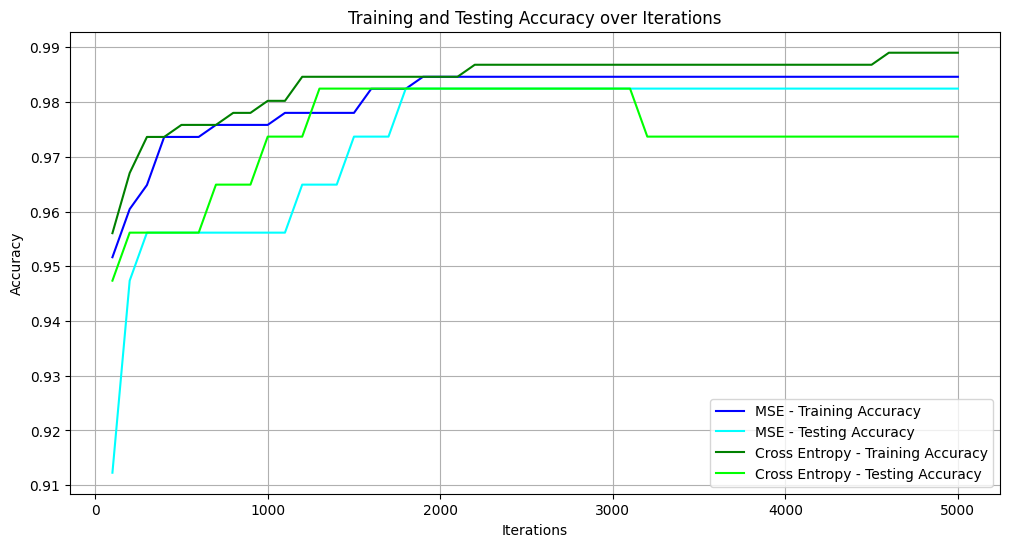

In [155]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming LogisticRegressionMSE and LogisticRegressionCrossEntropy are already defined
# If not, include their definitions here.

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Normalize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
train_data, test_data, train_label, test_label = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Logistic Regression model with MSE Loss
model_mse = LogisticRegressionMSE(
    train_data=train_data,
    train_label=train_label,
    test_data=test_data,
    test_label=test_label,
    learning_rate=0.01,
    iterations=5000
)

print("Training Logistic Regression with MSE Loss...")
model_mse.fit()

# Initialize and train the Logistic Regression model with Cross Entropy Loss
model_ce = LogisticRegressionCrossEntropy(
    train_data=train_data,
    train_label=train_label,
    test_data=test_data,
    test_label=test_label,
    learning_rate=0.01,
    iterations=5000
)

print("\nTraining Logistic Regression with Cross Entropy Loss...")
model_ce.fit()

# Train scikit-learn's Logistic Regression for comparison
sklearn_model = SklearnLogisticRegression(
    solver='lbfgs',
    max_iter=5000,
    random_state=42
)
sklearn_model.fit(train_data, train_label)

# Make predictions with scikit-learn's model
sklearn_train_pred = sklearn_model.predict(train_data)
sklearn_test_pred = sklearn_model.predict(test_data)

# Calculate accuracies
accuracy_mse_train = accuracy_score(train_label, model_mse.predict(train_data))
accuracy_mse_test = accuracy_score(test_label, model_mse.predict(test_data))

accuracy_ce_train = accuracy_score(train_label, model_ce.predict(train_data))
accuracy_ce_test = accuracy_score(test_label, model_ce.predict(test_data))

accuracy_sklearn_train = accuracy_score(train_label, sklearn_train_pred)
accuracy_sklearn_test = accuracy_score(test_label, sklearn_test_pred)

# Print the accuracies
print("\nFinal Accuracies:")
print("-------------------------------------------------")
print(f"Logistic Regression with MSE Loss - Training Accuracy: {accuracy_mse_train:.4f}")
print(f"Logistic Regression with MSE Loss - Testing Accuracy:  {accuracy_mse_test:.4f}")
print("-------------------------------------------------")
print(f"Logistic Regression with Cross Entropy Loss - Training Accuracy: {accuracy_ce_train:.4f}")
print(f"Logistic Regression with Cross Entropy Loss - Testing Accuracy:  {accuracy_ce_test:.4f}")
print("-------------------------------------------------")
print(f"Scikit-learn Logistic Regression - Training Accuracy: {accuracy_sklearn_train:.4f}")
print(f"Scikit-learn Logistic Regression - Testing Accuracy:  {accuracy_sklearn_test:.4f}")
print("-------------------------------------------------")

# Plotting the accuracies over iterations for custom implementations
iterations = np.arange(100, model_mse.iterations + 1, 100)

plt.figure(figsize=(12, 6))

# Plot for Logistic Regression with MSE Loss
plt.plot(iterations, model_mse.accuracy_train_data_during_training, label='MSE - Training Accuracy', color='blue')
plt.plot(iterations, model_mse.accuracy_test_data_during_training, label='MSE - Testing Accuracy', color='cyan')

# Plot for Logistic Regression with Cross Entropy Loss
plt.plot(iterations, model_ce.accuracy_train_data_during_training, label='Cross Entropy - Training Accuracy', color='green')
plt.plot(iterations, model_ce.accuracy_test_data_during_training, label='Cross Entropy - Testing Accuracy', color='lime')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

#### Experiment

Dataset preparation

In [156]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

Training Logistic Regression with MSE Loss...
Iteration 100: Loss=0.2247, Train Accuracy=0.7753, Test Accuracy=0.7799
Iteration 200: Loss=0.2069, Train Accuracy=0.7801, Test Accuracy=0.7799
Iteration 300: Loss=0.1944, Train Accuracy=0.7769, Test Accuracy=0.7873
Iteration 400: Loss=0.1854, Train Accuracy=0.7769, Test Accuracy=0.7873
Iteration 500: Loss=0.1788, Train Accuracy=0.7769, Test Accuracy=0.7910
Iteration 600: Loss=0.1738, Train Accuracy=0.7865, Test Accuracy=0.7910
Iteration 700: Loss=0.1699, Train Accuracy=0.7865, Test Accuracy=0.7873
Iteration 800: Loss=0.1669, Train Accuracy=0.7865, Test Accuracy=0.7873
Iteration 900: Loss=0.1644, Train Accuracy=0.7849, Test Accuracy=0.7873
Iteration 1000: Loss=0.1624, Train Accuracy=0.7849, Test Accuracy=0.7799
Iteration 1100: Loss=0.1607, Train Accuracy=0.7849, Test Accuracy=0.7799
Iteration 1200: Loss=0.1593, Train Accuracy=0.7865, Test Accuracy=0.7799
Iteration 1300: Loss=0.1582, Train Accuracy=0.7849, Test Accuracy=0.7836
Iteration 1400

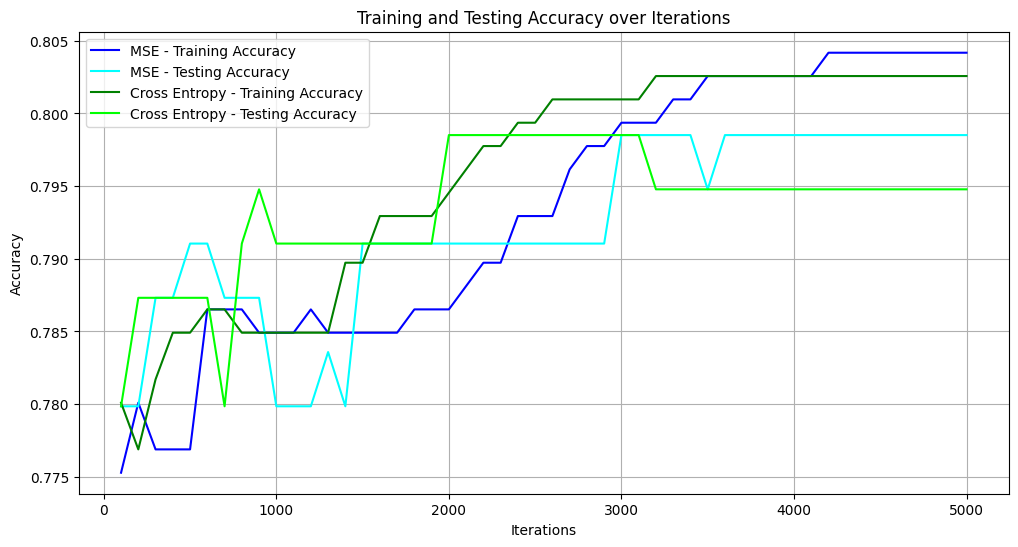

In [157]:
# Feature Scaling: Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression with MSE Loss
model_mse = LogisticRegressionMSE(
    train_data=X_train_scaled,
    train_label=y_train,
    test_data=X_test_scaled,
    test_label=y_test,
    learning_rate=0.01,
    iterations=5000
)

print("Training Logistic Regression with MSE Loss...")
model_mse.fit()

# Initialize and train Logistic Regression with Cross Entropy Loss
model_ce = LogisticRegressionCrossEntropy(
    train_data=X_train_scaled,
    train_label=y_train,
    test_data=X_test_scaled,
    test_label=y_test,
    learning_rate=0.01,
    iterations=5000
)

print("\nTraining Logistic Regression with Cross Entropy Loss...")
model_ce.fit()

# Predict on test data using both models
y_test_pred_mse = model_mse.predict(X_test_scaled)
y_test_pred_ce = model_ce.predict(X_test_scaled)

# Calculate accuracy scores
accuracy_mse = accuracy_score(y_test, y_test_pred_mse)
accuracy_ce = accuracy_score(y_test, y_test_pred_ce)

# Display the accuracy scores
print("\nAccuracy on Test Data:")
print(f"Logistic Regression with MSE Loss: {accuracy_mse:.4f}")
print(f"Logistic Regression with Cross Entropy Loss: {accuracy_ce:.4f}")

# (Optional) Plotting the accuracies over iterations
iterations = np.arange(100, model_mse.iterations + 1, 100)

plt.figure(figsize=(12, 6))

# Plot for Logistic Regression with MSE Loss
plt.plot(iterations, model_mse.accuracy_train_data_during_training, label='MSE - Training Accuracy', color='blue')
plt.plot(iterations, model_mse.accuracy_test_data_during_training, label='MSE - Testing Accuracy', color='cyan')

# Plot for Logistic Regression with Cross Entropy Loss
plt.plot(iterations, model_ce.accuracy_train_data_during_training, label='Cross Entropy - Training Accuracy', color='green')
plt.plot(iterations, model_ce.accuracy_test_data_during_training, label='Cross Entropy - Testing Accuracy', color='lime')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

Plot the training and test accuracy across the learning iterations of gradient descent

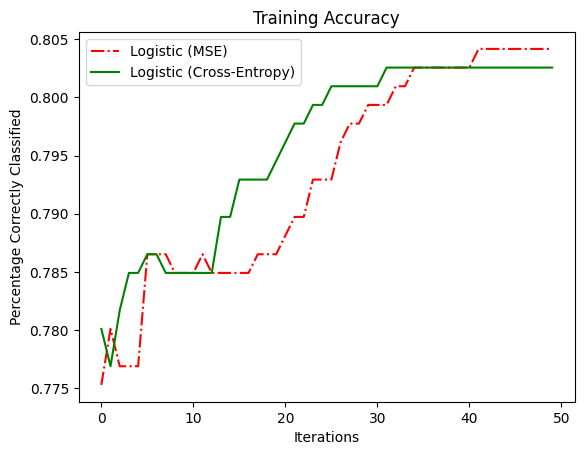

In [158]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(model_mse.accuracy_train_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_train_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

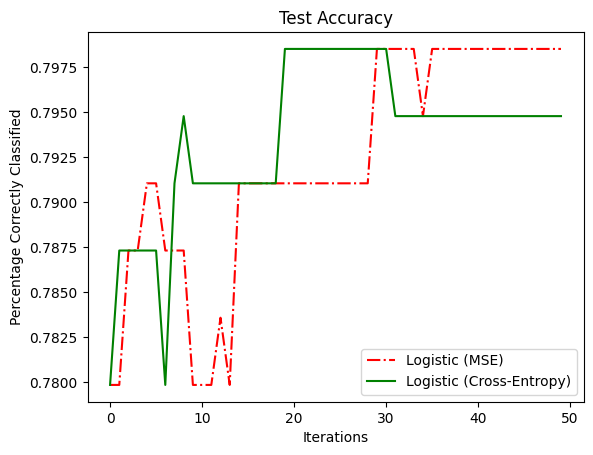

In [159]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Test Accuracy')
plt.plot(model_mse.accuracy_test_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_test_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

**Mean Squared Error (MSE) Loss:**
- **What It Does:** Measures the average squared difference between the predicted probabilities and the actual labels.
- **Usage:** Commonly used for regression tasks where we predict continuous values.
- **Behavior in Logistic Regression:** Treats the classification problem like a regression problem, focusing on minimizing the error between predicted probabilities and actual labels.

**Cross Entropy Loss:**
- **What It Does:** Measures the difference between the predicted probability distribution and the actual distribution (which is usually one-hot encoded for classification).
- **Usage:** Specifically designed for classification tasks.
- **Behavior in Logistic Regression:** Focuses on maximizing the probability of the correct class, making it more suitable for classification.

**Why Cross Entropy Learns Faster:**
- **Alignment with Classification Goals:** Cross Entropy directly measures how well the predicted probabilities align with the actual classes, providing more meaningful gradients for classification.
- **Efficient Gradient Descent:** The gradients from Cross Entropy are more informative for updating the model's weights, leading to faster and more stable convergence.
- **Avoids Saturation Issues:** MSE can lead to smaller gradients when predictions are confident but incorrect, slowing down learning. Cross Entropy maintains stronger gradients in these scenarios, speeding up the learning process.

**Conclusion:**
Think of MSE as trying to make your guesses as close as possible to the actual answers by minimizing the overall error. On the other hand, Cross Entropy is like focusing on getting each individual answer right by maximizing the chances of the correct choice. Because Cross Entropy zeroes in on getting the right answers, it helps the model learn faster and more effectively during training.

---

Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)


Training with Iterations: 50

Training with Iterations: 500
Iteration 100: Loss=0.2247, Train Accuracy=0.7753, Test Accuracy=0.7799
Iteration 200: Loss=0.2069, Train Accuracy=0.7801, Test Accuracy=0.7799
Iteration 300: Loss=0.1944, Train Accuracy=0.7769, Test Accuracy=0.7873
Iteration 400: Loss=0.1854, Train Accuracy=0.7769, Test Accuracy=0.7873
Iteration 500: Loss=0.1788, Train Accuracy=0.7769, Test Accuracy=0.7910
Iteration 100: Loss=0.6051, Train Accuracy=0.7801, Test Accuracy=0.7799
Iteration 200: Loss=0.5565, Train Accuracy=0.7769, Test Accuracy=0.7873
Iteration 300: Loss=0.5279, Train Accuracy=0.7817, Test Accuracy=0.7873
Iteration 400: Loss=0.5101, Train Accuracy=0.7849, Test Accuracy=0.7873
Iteration 500: Loss=0.4983, Train Accuracy=0.7849, Test Accuracy=0.7873

Training with Iterations: 5000
Iteration 100: Loss=0.2247, Train Accuracy=0.7753, Test Accuracy=0.7799
Iteration 200: Loss=0.2069, Train Accuracy=0.7801, Test Accuracy=0.7799
Iteration 300: Loss=0.1944, Train Accuracy=

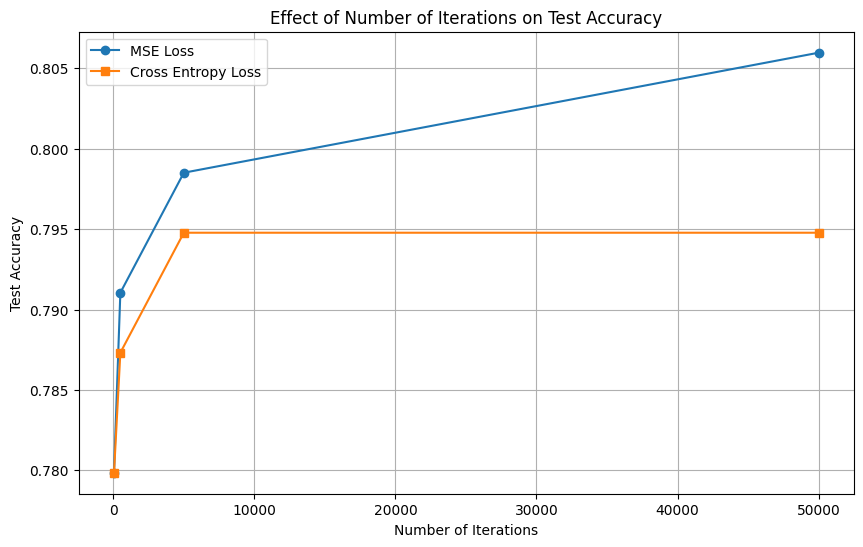

In [160]:
# Define different numbers of iterations to test
iteration_counts = [50, 500, 5000, 50000]

# Initialize dictionaries to store accuracies
accuracies_mse_iters = {}
accuracies_ce_iters = {}

# Fixed Learning Rate
fixed_lr = 0.01

# Training and Recording Accuracies for Different Number of Iterations
for iters in iteration_counts:
    print(f"\nTraining with Iterations: {iters}")

    # Logistic Regression with MSE Loss
    model_mse = LogisticRegressionMSE(
        train_data=X_train_scaled,
        train_label=y_train,
        test_data=X_test_scaled,
        test_label=y_test,
        learning_rate=fixed_lr,
        iterations=iters
    )
    model_mse.fit()
    acc_mse = accuracy_score(y_test, model_mse.predict(X_test_scaled))
    accuracies_mse_iters[iters] = acc_mse

    # Logistic Regression with Cross Entropy Loss
    model_ce = LogisticRegressionCrossEntropy(
        train_data=X_train_scaled,
        train_label=y_train,
        test_data=X_test_scaled,
        test_label=y_test,
        learning_rate=fixed_lr,
        iterations=iters
    )
    model_ce.fit()
    acc_ce = accuracy_score(y_test, model_ce.predict(X_test_scaled))
    accuracies_ce_iters[iters] = acc_ce

# Plotting the Test Accuracies for Different Number of Iterations
plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, list(accuracies_mse_iters.values()), marker='o', label='MSE Loss')
plt.plot(iteration_counts, list(accuracies_ce_iters.values()), marker='s', label='Cross Entropy Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Test Accuracy')
plt.title('Effect of Number of Iterations on Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [162]:
class DecisionTree:
    def __init__(self, columns, depth=None):
        """
        Initialize the Decision Tree.

        Parameters:
        - columns (list): List of feature names.
        - depth (int, optional): Maximum depth of the tree. Defaults to None (no limit).
        """
        self.max_depth = depth
        self.columns = columns
        self.tree = None

    def fit(self, train_data, train_label):
        """
        Build the decision tree based on the training data and labels.

        Parameters:
        - train_data (numpy.ndarray): Training feature data.
        - train_label (numpy.ndarray): Training labels.
        """
        data = np.column_stack((train_data, train_label))
        self.tree = self._build_tree(data, depth=0)

    def predict(self, test_data):
        """
        Predict the labels for the test data.

        Parameters:
        - test_data (numpy.ndarray): Test feature data.

        Returns:
        - numpy.ndarray: Predicted labels.
        """
        predictions = [self._traverse_tree(x, self.tree) for x in test_data]
        return np.array(predictions)

    def print_tree(self):
        """
        Print the decision tree using preorder traversal.
        """
        self._print_tree_recursive(self.tree)

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
            """
            Represents a node in the decision tree.

            Parameters:
            - feature (int, optional): Index of the feature to split on.
            - threshold (float, optional): Threshold value for the split.
            - left (Node, optional): Left child node.
            - right (Node, optional): Right child node.
            - label (int, optional): Class label if the node is a leaf.
            """
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.label = label

    def _build_tree(self, data, depth):
        """
        Recursively build the decision tree.

        Parameters:
        - data (numpy.ndarray): Data at the current node.
        - depth (int): Current depth of the node.

        Returns:
        - Node: The constructed node.
        """
        X, y = data[:, :-1], data[:, -1]
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or num_classes == 1 or num_samples == 0:
            leaf_label = self._majority_vote(y)
            return self.Node(label=leaf_label)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y, num_features)

        if best_feature is None:
            leaf_label = self._majority_vote(y)
            return self.Node(label=leaf_label)

        # Split the data
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        left = data[left_indices]
        right = data[right_indices]

        # Handle cases where no split is possible
        if len(left) == 0 or len(right) == 0:
            leaf_label = self._majority_vote(y)
            return self.Node(label=leaf_label)

        # Recursively build left and right subtrees
        left_child = self._build_tree(left, depth + 1)
        right_child = self._build_tree(right, depth + 1)
        return self.Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _best_split(self, X, y, num_features):
        """
        Find the best feature and threshold to split on.

        Parameters:
        - X (numpy.ndarray): Feature data.
        - y (numpy.ndarray): Labels.
        - num_features (int): Number of features.

        Returns:
        - best_feature (int): Index of the best feature.
        - best_threshold (float): Threshold value for the best split.
        """
        best_gini = 1.0
        best_feature, best_threshold = None, None
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}

        for feature in range(num_features):
            # Sort data along the feature
            sorted_indices = np.argsort(X[:, feature])
            sorted_X = X[sorted_indices, feature]
            sorted_y = y[sorted_indices]

            # Initialize counts
            num_left = [0] * num_classes
            num_right = np.bincount(sorted_y.astype(int), minlength=num_classes).tolist()

            for i in range(1, len(y)):
                label = int(sorted_y[i - 1])  # Ensure label is int
                if label in class_to_index:
                    idx = class_to_index[label]
                    num_left[idx] += 1
                    num_right[idx] -= 1
                else:
                    # Handle unexpected class labels
                    continue

                # Skip if the current threshold is the same as the previous
                if sorted_X[i] == sorted_X[i - 1]:
                    continue

                # Calculate Gini impurity for left and right splits
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(num_classes))
                gini_right = 1.0 - sum((num_right[x] / (len(y) - i)) ** 2 for x in range(num_classes))
                gini = (i * gini_left + (len(y) - i) * gini_right) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = (sorted_X[i] + sorted_X[i - 1]) / 2  # Use midpoint as threshold

        return best_feature, best_threshold

    def _majority_vote(self, y):
        """
        Determine the majority class label.

        Parameters:
        - y (numpy.ndarray): Labels.

        Returns:
        - int: Majority class label.
        """
        counts = np.bincount(y.astype(int))
        return np.argmax(counts)

    def _traverse_tree(self, x, node):
        """
        Traverse the tree to make a prediction for a single sample.

        Parameters:
        - x (numpy.ndarray): Single sample features.
        - node (Node): Current node in the tree.

        Returns:
        - int: Predicted label.
        """
        if node.label is not None:
            return node.label

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

    def _print_tree_recursive(self, node, depth=0):
        """
        Recursively print the tree structure.

        Parameters:
        - node (Node): Current node in the tree.
        - depth (int): Current depth for indentation.
        """
        if node.label is not None:
            print("\t" * depth + f"Leaf: {node.label}")
            return

        feature_name = self.columns[node.feature]
        print("\t" * depth + f"{feature_name} <= {node.threshold:.4f}")
        self._print_tree_recursive(node.left, depth + 1)
        print("\t" * depth + f"{feature_name} > {node.threshold:.4f}")
        self._print_tree_recursive(node.right, depth + 1)


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [163]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
Y = data.target  # 0 = malignant, 1 = benign
columns = data.feature_names

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(pd.DataFrame(X, columns=columns).head())

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

# Feature Scaling: Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree
# Select a subset of features for better visualization (optional)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
selected_indices = [list(columns).index(feature) for feature in selected_features]
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]
selected_columns = selected_features

decision_tree = DecisionTree(columns=selected_columns, depth=3)  # Adjust depth as needed
decision_tree.fit(X_train_selected, y_train)

# Predict on test data
y_test_pred = decision_tree.predict(X_test_selected)

# Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_test_pred)
print(f"Custom Decision Tree Accuracy on Test Data: {accuracy_custom:.4f}")

# Print the tree structure
print("\nCustom Decision Tree Structure:")
decision_tree.print_tree()


First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Custom Decision Tree Accuracy on Test Data: 0.8363

Custom Decision Tree Structure:
mean perimeter <= 0.2965
	mean perimeter <= -0.2715
		mean smoothness <= 1.6697
			Leaf: 1
		mean smoothness > 1.6697
			Leaf: 0
	mean perimeter > -0.2715
		mean smoothness <= -0.4230
			Leaf: 1
		mean smoothness > -0.4230
			Leaf: 0
mean perimeter > 0.2965
	mean texture <= -1.1672
		mean texture <= -1.5088
			Leaf: 0
		mean texture > -1.5088
			Leaf: 1
	mean texture > -1.1672
		mean smoothness <= -1.5811
			Leaf: 0
		mean smoothness > -1.5811
			Leaf: 0


#### Experiment

Dataset preparation

In [164]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [165]:
# Feature Scaling: Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree
decision_tree = DecisionTree(columns=columns, depth=5)  # You can adjust the depth as needed
decision_tree.fit(X_train_scaled, y_train)

# Predict on test data
y_test_pred = decision_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_test_pred)
print(f"Custom Decision Tree Accuracy on Test Data: {accuracy_custom:.4f}")

Custom Decision Tree Accuracy on Test Data: 0.7761


Print the decision tree (5 points)

In [166]:
decision_tree.print_tree()

Survived <= 0.3333
	Sex <= 0.4008
		Name <= 0.1402
			Sex <= -0.1117
				Sex <= -0.4846
					Leaf: 0
				Sex > -0.4846
					Leaf: 0
			Sex > -0.1117
				Sex <= -0.0214
					Leaf: 0
				Sex > -0.0214
					Leaf: 0
		Name > 0.1402
			Sex <= -0.1121
				PassengerId <= 0.1930
					Leaf: 1
				PassengerId > 0.1930
					Leaf: 0
			Sex > -0.1121
				Sex <= -0.0100
					Leaf: 0
				Sex > -0.0100
					Leaf: 0
	Sex > 0.4008
		Pclass <= 0.7601
			Sex <= 0.5344
				Name <= 0.1402
					Leaf: 1
				Name > 0.1402
					Leaf: 1
			Sex > 0.5344
				Sex <= 6.9788
					Leaf: 0
				Sex > 6.9788
					Leaf: 1
		Pclass > 0.7601
			Leaf: 0
Survived > 0.3333
	PassengerId <= 0.1930
		Sex <= 2.2985
			Sex <= -0.0487
				Sex <= -0.0708
					Leaf: 1
				Sex > -0.0708
					Leaf: 0
			Sex > -0.0487
				Leaf: 1
		Sex > 2.2985
			Sex <= 2.3666
				Leaf: 0
			Sex > 2.3666
				Leaf: 1
	PassengerId > 0.1930
		Sex <= -0.1665
			Sex <= -0.3230
				Sex <= -0.4722
					Leaf: 1
				Sex > -0.4722
					Leaf: 0
			Sex > -0.3230
		

Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)


Training Decision Trees with max_depth = 1
Custom Decision Tree Accuracy: 0.7910
scikit-learn Decision Tree Accuracy: 0.7910

Training Decision Trees with max_depth = 2
Custom Decision Tree Accuracy: 0.7724
scikit-learn Decision Tree Accuracy: 0.7724

Training Decision Trees with max_depth = 3
Custom Decision Tree Accuracy: 0.8097
scikit-learn Decision Tree Accuracy: 0.8097

Training Decision Trees with max_depth = 4
Custom Decision Tree Accuracy: 0.7761
scikit-learn Decision Tree Accuracy: 0.7761

Training Decision Trees with max_depth = 5
Custom Decision Tree Accuracy: 0.7761
scikit-learn Decision Tree Accuracy: 0.7761

Training Decision Trees with max_depth = 6
Custom Decision Tree Accuracy: 0.7761
scikit-learn Decision Tree Accuracy: 0.7761

Training Decision Trees with max_depth = 7
Custom Decision Tree Accuracy: 0.7948
scikit-learn Decision Tree Accuracy: 0.7910

Training Decision Trees with max_depth = 8
Custom Decision Tree Accuracy: 0.7873
scikit-learn Decision Tree Accuracy:

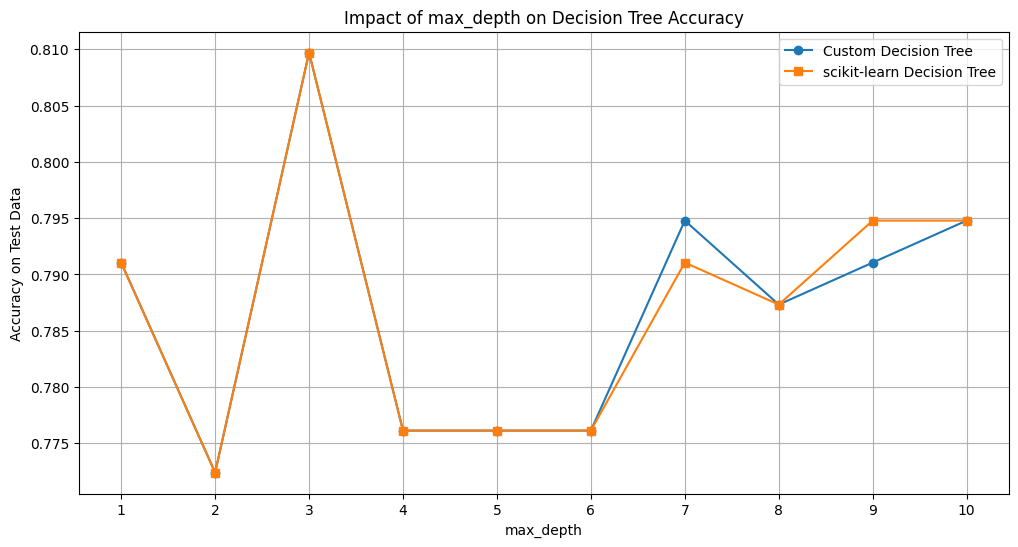

In [167]:
# Define the range of max_depth to test
max_depth_values = range(1, 11)  # 1 to 10

# Initialize lists to store accuracy scores
accuracy_custom = []
accuracy_sklearn = []

# Loop over different max_depth values
for depth in max_depth_values:
    print(f"\nTraining Decision Trees with max_depth = {depth}")

    # --- Custom Decision Tree ---
    decision_tree = DecisionTree(columns=columns, depth=depth)
    decision_tree.fit(X_train_scaled, y_train)
    y_pred_custom = decision_tree.predict(X_test_scaled)
    acc_custom = accuracy_score(y_test, y_pred_custom)
    accuracy_custom.append(acc_custom)
    print(f"Custom Decision Tree Accuracy: {acc_custom:.4f}")

    # --- scikit-learn Decision Tree ---
    sklearn_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    sklearn_tree.fit(X_train_scaled, y_train)
    y_pred_sklearn = sklearn_tree.predict(X_test_scaled)
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
    accuracy_sklearn.append(acc_sklearn)
    print(f"scikit-learn Decision Tree Accuracy: {acc_sklearn:.4f}")

# Plotting the Accuracy vs. max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, accuracy_custom, marker='o', label='Custom Decision Tree')
plt.plot(max_depth_values, accuracy_sklearn, marker='s', label='scikit-learn Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy on Test Data')
plt.title('Impact of max_depth on Decision Tree Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

In [168]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

In [169]:

# Display the first few rows of the dataset
print("First 5 rows of the Iris dataset:")
df = pd.DataFrame(X, columns=columns)
df['target'] = Y
display(df.head())

# Feature Scaling: Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree
decision_tree = DecisionTree(columns=columns, depth=4)  # You can adjust the depth as needed
decision_tree.fit(X_train_scaled, y_train)

# Print the tree structure
print("\nDecision Tree Structure:")
decision_tree.print_tree()

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Decision Tree Structure:
petal length (cm) <= -0.8292
	Leaf: 0
petal length (cm) > -0.8292
	sepal width (cm) <= 1.6562
		sepal width (cm) <= 1.1765
			petal length (cm) <= 1.6225
				Leaf: 1
			petal length (cm) > 1.6225
				Leaf: 2
		sepal width (cm) > 1.1765
			Leaf: 2
	sepal width (cm) > 1.6562
		Leaf: 2
